# Act Report

The objective of this report is to draw insights from the data wrangled in "wrangle_act.ipynb". 

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [4]:
df_master.head()

,tweet_id,source,text,expanded_urls,jpg_url,tweet_time,retweet,favorites,follows,stages,dog_prediction,conf_level,rating_numerator,rating_denominator,dog_count,dog_name,dog_gender
0,667437278097252352,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,2015-11-19 20:20:22,248.0,459.0,6903716.0,doggo,MysteryDog,0.000000,10.0,10.0,1.0,NaN,NaN
1,667443425659232256,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,2015-11-19 20:44:47,604.0,804.0,6903716.0,doggo,MysteryDog,0.000000,6.0,10.0,1.0,NaN,NaN
2,667453023279554560,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,2015-11-19 21:22:56,93.0,320.0,6903716.0,doggo,Labrador_retriever,0.825670,11.0,10.0,1.0,Cupcake,NaN
3,667455448082227200,Twitter Web Client,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,https://pbs.twimg.com/media/CUNHMXTU8AAS3HH.jpg,2015-11-19 21:32:34,65.0,195.0,6903716.0,doggo,Tibetan_terrier,0.676376,7.0,10.0,1.0,Reese,NaN
4,667470559035432960,Twitter Web Client,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,https://pbs.twimg.com/media/CUNU78YWEAECmpB.jpg,2015-11-19 22:32:36,101.0,264.0,6903716.0,doggo,toy_poodle,0.304175,11.0,10.0,1.0,Kohl,male


In [5]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 17 columns):
tweet_id              2075 non-null int64
source                2075 non-null object
text                  2075 non-null object
expanded_urls         2075 non-null object
jpg_url               2075 non-null object
tweet_time            2069 non-null object
retweet               2069 non-null float64
favorites             2069 non-null float64
follows               2069 non-null float64
stages                2075 non-null object
dog_prediction        2075 non-null object
conf_level            2075 non-null float64
rating_numerator      2074 non-null float64
rating_denominator    2074 non-null float64
dog_count             2075 non-null float64
dog_name              1373 non-null object
dog_gender            1397 non-null object
dtypes: float64(7), int64(1), object(9)
memory usage: 275.7+ KB


In [6]:
#We don't want to operate on tweet ID so turn it to object
df_master['tweet_id'] = df_master['tweet_id'].astype(object)


In [7]:
#Fix datetime format for tweet time
df_master['tweet_time'] = pd.to_datetime(df_master.tweet_time)

In [8]:
#Fix format for source
df_master['source'] = df_master['source'].astype('category')
#Fix format for dog state
df_master['stages'] = df_master['stages'].astype('category')
#Fix format for gender
df_master['dog_gender'] = df_master['dog_gender'].astype('category')


# Retweets and Favorites
Evaluate the relationship between retweets and favorites.

Text(0.5,1,'Favorites as a Function of Retweets')

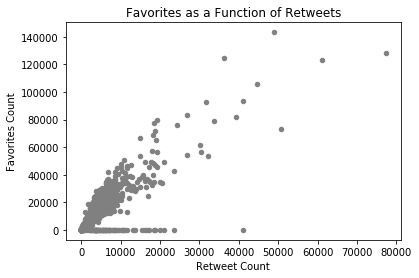

In [9]:
df_master.plot(x= 'retweet', y = 'favorites', kind='scatter', color='grey')
plt.xlabel('Retweet Count')
plt.ylabel('Favorites Count')
plt.title('Favorites as a Function of Retweets')

Text(0.5,1,'Favorites as a Function of Retweets')

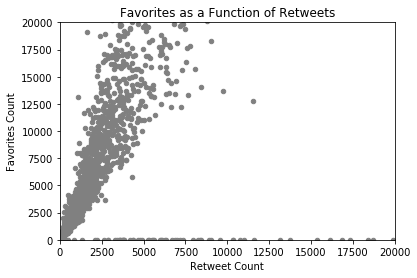

In [10]:
#Replot the above and set lmits on the axes
df_master.plot(x= 'retweet', y = 'favorites', kind='scatter', color='grey', xlim=(0, 2e4), ylim=(0, 2e4))
plt.xlabel('Retweet Count')
plt.ylabel('Favorites Count')
plt.title('Favorites as a Function of Retweets')


In [11]:
len(df_master[df_master['favorites'] == 0])

75

There appears to be a positive correlation between retweets and favorites.
There also seem to be many tweets with a lot of retweets but no favorites.

# Dog Gender
Evualte the disribution of gender among the dogs. 
<br>Determine if one gender gets better ratings

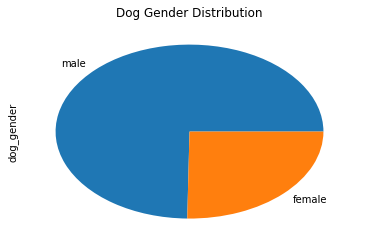

In [16]:
#Pie chart is best representation
#Ignore cases where gender is unclear or more than one dog
df_master[df_master['dog_gender'].notnull()]['dog_gender'].value_counts().plot(kind = 'pie')
plt.title('Dog Gender Distribution');

In [18]:
#Evaluate the mean rating for male dogs
df_master[df_master['dog_gender'] == "male"]['rating_numerator'].mean()

12.269396551724139

In [19]:
#Evaluate the mean rating for female dogs
df_master[df_master['dog_gender'] == "female"]['rating_numerator'].mean()

11.242244318181818

It seems that males get higher ratings, see if the standard deviating is similar.

In [29]:
np.std(df_master[df_master['dog_gender'] == "male"]['rating_numerator'])

54.650649853639635

In [30]:
np.std(df_master[df_master['dog_gender'] == "female"]['rating_numerator'])

1.5648089548914992

The standard deviation varies immensly, maybe due to a few dogs with very high raitngs

# Dog Stages

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


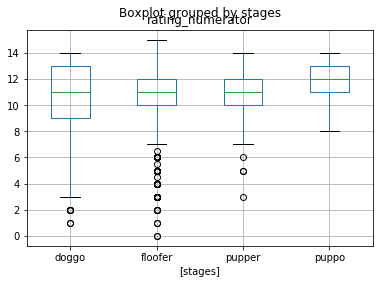

In [39]:
df_master[df_master['rating_numerator'] <= 20].boxplot(column = ['rating_numerator'], by = ['stages'])


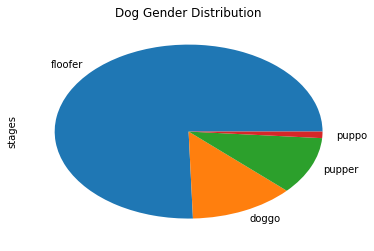

In [41]:
df_master['stages'].value_counts().plot(kind = 'pie')
plt.title('Dog Stages Distribution');

The majority of dogs seem to be at floofer stage.
<br> On average the rarest of the bunch, doggos, get the highest average ratings.

# Dog Breeds

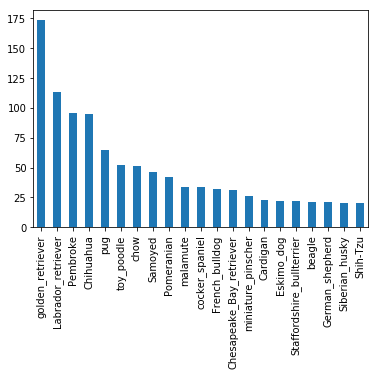

In [48]:
#Group the breeds with at least 20 instaces
dog_breed_20=df_master.groupby('dog_prediction').filter(lambda x: len(x) >= 20)
dog_breed_20 = dog_breed_20[dog_breed_20['dog_prediction'] != 'MysteryDog']
dog_breed_20['dog_prediction'].value_counts().plot(kind = 'bar')


In [49]:
dog_breed_20.groupby('dog_prediction')['rating_numerator'].describe()


,count,mean,std,min,25%,50%,75%,max
dog_prediction,,,,,,,,
Cardigan,23.0,11.173913,1.527094,7.0,10.50,11.00,12.00,13.0
Chesapeake_Bay_retriever,31.0,10.741935,1.510358,8.0,10.00,10.00,12.00,13.0
Chihuahua,95.0,10.610526,2.078485,3.0,10.00,11.00,12.00,14.0
Eskimo_dog,22.0,11.409091,1.402688,9.0,10.00,12.00,12.00,14.0
French_bulldog,32.0,11.281250,1.835745,8.0,10.00,12.00,12.25,14.0
German_shepherd,21.0,11.000000,1.449138,8.0,10.00,11.00,12.00,13.0
Labrador_retriever,113.0,11.181416,1.317909,7.0,10.00,11.00,12.00,14.0
Pembroke,96.0,11.406250,1.744635,4.0,11.00,12.00,12.00,14.0
Pomeranian,42.0,10.779762,1.619435,6.0,10.00,11.00,12.00,14.0


The most common dog is the golden retriever, followed by the labrador retriever. These two breeds are very similar and retrievers are among the most popular breeds in the USA.
<br>There is an inherent bias from the prediction algorithm, for example popular dog breeds might be very easy to identify.
<br>
<br>At a glance, the mean rating for the identifiable dog breeds is similar, varying in the 10-11 range.